<a href="https://colab.research.google.com/github/k25harikesh/Equipment_err-Prediction/blob/main/Machine_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importig basic libraries


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data and doing sanitisation


In [81]:
data = pd.read_csv('data.csv')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

**Data has 10k rows and 14 columns**

None of the data is missing

In [83]:
data.head(8)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0


In [84]:
data['Type'].value_counts()
data['RNF'].value_counts()
data['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

**After analysing the data we found any of the last 6 columns giving a failure value would cause a failure in machine**

so we will aggregate these coulumns and give failure if any of the column indicates a failure


In [85]:
# Select the last 6 columns for aggregation
columns_to_aggregate = data.columns[-6:]
columns_to_aggregate

Index(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')

In [86]:
# Create a new column 'Result' with 1 if any of the last 6 columns has a value of 1 in that row, otherwise 0
# 1: failure, 2: success
data['Result'] = data[columns_to_aggregate].max(axis=1)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
 14  Result                 

In [88]:
data['Result'].value_counts()

0    9643
1     357
Name: Result, dtype: int64

In [89]:
data = data.drop(columns_to_aggregate, axis=1)
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Result
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


Dropping some useless columns

In [90]:
data.drop(['UDI', 'Product ID'], axis=1, inplace=True)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Result
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


changing column names


In [91]:
column_name_mapping = {'Air temperature [K]': 'Air_temp', 'Process temperature [K]': 'Process_temp',
                       'Rotational speed [rpm]': 'speed', 'Torque [Nm]': 'Torque', 'Tool wear [min]' : 'tool'}
data.rename(columns=column_name_mapping, inplace=True)
data.head(2)

,Type,Air_temp,Process_temp,speed,Torque,tool,Result
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0


# let's scale our data

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
columns_to_scale = ['Air_temp', 'Process_temp', 'speed', 'Torque', 'tool']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
# converting type to a numericl value
data = pd.get_dummies(data, columns=['Type'], drop_first=True)
data.tail()

,Air_temp,Process_temp,speed,Torque,tool,Result,Type_L,Type_M
9995,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0,0,1
9996,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,0,0,0
9997,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0,0,1
9998,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,0,0,0
9999,-0.502425,-0.879959,-0.216294,0.021376,-1.224663,0,0,1


# Finding Corr with Result

In [95]:
# Calculating the correlation with the 'Result' column
correlation_with_result = data.corrwith(data['Result'])
print(correlation_with_result)

Air_temp        0.084217
Process_temp    0.039965
speed          -0.045769
Torque          0.190050
tool            0.104671
Result          1.000000
Type_L          0.036085
Type_M         -0.025874
dtype: float64


# Plotting corr graph

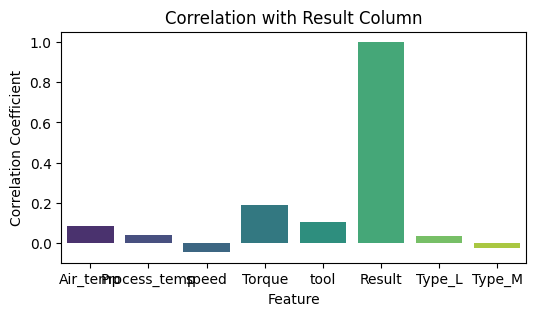

In [96]:
plt.figure(figsize=(6, 3))
sns.barplot(x=correlation_with_result.index, y=correlation_with_result.values, palette="viridis")
plt.title('Correlation with Result Column')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.show()

# Train test splitting and Feature, label splitting


In [97]:
from sklearn.model_selection  import train_test_split

In [98]:
x = data.drop('Result', axis=1)
y = data['Result']
print(x.head(), y.head())

   Air_temp  Process_temp     speed    Torque      tool  Type_L  Type_M
0 -0.952389     -0.947360  0.068185  0.282200 -1.695984       0       1
1 -0.902393     -0.879959 -0.729472  0.633308 -1.648852       1       0
2 -0.952389     -1.014761 -0.227450  0.944290 -1.617430       1       0
3 -0.902393     -0.947360 -0.590021 -0.048845 -1.586009       1       0
4 -0.902393     -0.879959 -0.729472  0.001313 -1.554588       1       0 0    0
1    0
2    0
3    0
4    0
Name: Result, dtype: int64


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Model selection and Metrics importation

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

In [102]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Model Result

In [103]:
# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.97
Confusion Matrix:
[[1925    4]
 [  64    7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1929
           1       0.64      0.10      0.17        71

    accuracy                           0.97      2000
   macro avg       0.80      0.55      0.58      2000
weighted avg       0.96      0.97      0.95      2000

